## Máster Big Data - Fundamentos matemáticos del análisis de datos

### Proyecto de la asignatura

#### Melbourne Housing Market Data

Los datos originales pueden encontrarse [aquí](https://www.kaggle.com/anthonypino/melbourne-housing-market).

Los datos, disponibles públicamente, fueron adquiridos mediante _web scrapping_ de [domain.com.au](domain.com.au). Antes de ser publicados en Kaggle fueron tratados para facilitar su uso. El conjunto de datos incluye:
- Dirección (Address)
- Tipo de propiedad (Type of Real estate)
- Barrio (Suburb)
- Método de venta (Method of Selling)
- Habitaciones (Rooms)
- Precio (Price)
- Agente (Real estate agent)
- Fecha de venta (Date of sale)
- Distancia de C.B.D. (Distance from C.B.D.)

###### En Kaggle se incluyen el nombre de las variables y una breve descripción de su contenido.

- **Suburb**: Suburb
- **Address**: Address
- **Rooms**: Number of rooms
- **Price**: Price in Australian dollars
- **Method**:
    - S - property sold
    - SP - property sold prior
    - PI - property passed in
    - PN - sold prior not disclosed
    - SN - sold not disclosed
    - NB - no bid
    - VB - vendor bid
    - W - withdrawn prior to auction
    - SA - sold after auction
    - SS - sold after auction price not disclosed.
    - N/A - price or highest bid not available.
- **Type**:
    - br - bedroom(s)
    - h - house,cottage,villa, semi,terrace
    - u - unit, duplex
    - t - townhouse
    - dev site - development site
    - o res - other residential.
- **SellerG**: Real Estate Agent
- **Date**: Date sold
- **Distance**: Distance from CBD in Kilometres
- **Regionname**: General Region (West, North West, North, North east …etc)
- **Propertycount**: Number of properties that exist in the suburb.
- **Bedroom2**: Scraped # of Bedrooms (from different source)
- **Bathroom**: Number of Bathrooms
- **Car**: Number of carspots
- **Landsize**: Land Size in Metres
- **BuildingArea**: Building Size in Metres
- **YearBuilt**: Year the house was built
- **CouncilArea**: Governing council for the area
- **Lattitude**: Self explanitory
- **Longtitude**: Self explanitory

In [ ]:
# install.packages('tidyverse')
# install.packages('corrplot')
# install.packages('lubridate')

In [1]:
library(tidyverse)
library(corrplot)
library(lubridate)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:
hfull = read_csv("./data/Melbourne_housing_FULL.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  Suburb = col_character(),
  Address = col_character(),
  Type = col_character(),
  Method = col_character(),
  SellerG = col_character(),
  Date = col_character(),
  CouncilArea = col_character(),
  Regionname = col_character()
)
i Use `spec()` for the full column specifications.

Warning message:
"5 parsing failures.
  row           col expected actual                                file
18524 Propertycount a double   #N/A './data/Melbourne_housing_FULL.csv'
26889 Propertycount a double   #N/A './data/Melbourne_housing_FULL.csv'
29484 Distance      a double   #N/A './data/Melbourne_housing_FULL.csv'
29484 Postcode      a double   #N/A './data/Melbourne_housing_FULL.csv'
29484 Propertycount a double   #N/A './data/Melbourne_housing_FULL.csv'
"

In [3]:
head(hfull)
tail(hfull)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126,NA,NA,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,NA,NA,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0,NA,NA,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,NA,NA,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019


Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Yarraville,78 Bayview Rd,3,h,1101000,S,Jas,24/02/2018,6.3,3013,...,1,NA,288,NA,NA,Maribyrnong City Council,-37.81095,144.8852,Western Metropolitan,6543
Yarraville,13 Burns St,4,h,1480000,PI,Jas,24/02/2018,6.3,3013,...,1,3,593,NA,NA,Maribyrnong City Council,-37.81053,144.8847,Western Metropolitan,6543
Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24/02/2018,6.3,3013,...,2,1,98,104,2018,Maribyrnong City Council,-37.81551,144.8883,Western Metropolitan,6543
Yarraville,147A Severn St,2,t,705000,S,Jas,24/02/2018,6.3,3013,...,1,2,220,120,2000,Maribyrnong City Council,-37.82286,144.8786,Western Metropolitan,6543
Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,24/02/2018,6.3,3013,...,NA,NA,NA,NA,NA,Maribyrnong City Council,NA,NA,Western Metropolitan,6543
Yarraville,3 Tarrengower St,2,h,1020000,PI,RW,24/02/2018,6.3,3013,...,1,0,250,103,1930,Maribyrnong City Council,-37.81810,144.8935,Western Metropolitan,6543


In [4]:
dim(hfull)

[1] 34857    21

Después de leer el archivo y realizar una breve inspección para ver que los datos se han cargado correctamente, comprobamos las dimensiones del conjunto de datos y vemos que contiene 34857 observaciones y 21 variables.

In [5]:
str(hfull)

tibble [34,857 x 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Suburb       : chr [1:34857] "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address      : chr [1:34857] "68 Studley St" "85 Turner St" "25 Bloomburg St" "18/659 Victoria St" ...
 $ Rooms        : num [1:34857] 2 2 2 3 3 3 4 4 2 2 ...
 $ Type         : chr [1:34857] "h" "h" "h" "u" ...
 $ Price        : num [1:34857] NA 1480000 1035000 NA 1465000 ...
 $ Method       : chr [1:34857] "SS" "S" "S" "VB" ...
 $ SellerG      : chr [1:34857] "Jellis" "Biggin" "Biggin" "Rounds" ...
 $ Date         : chr [1:34857] "3/09/2016" "3/12/2016" "4/02/2016" "4/02/2016" ...
 $ Distance     : num [1:34857] 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode     : num [1:34857] 3067 3067 3067 3067 3067 ...
 $ Bedroom2     : num [1:34857] 2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom     : num [1:34857] 1 1 1 2 2 2 1 2 1 2 ...
 $ Car          : num [1:34857] 1 1 0 1 0 1 2 2 2 1 ...
 $ Landsize     : num [1:34857] 126 202 156 0 134 94 120

Comprobamos cuántos valores ausentes presenta el conjunto de datos.

In [6]:
sum(is.na(hfull)); dim(hfull)[1] * dim(hfull)[2]

[1] 100969

[1] 731997

El orden de magnitud del número de valores ausentes es similar al del número de datos. Continuamos con la exploración, identificando cuántos valores ausentes hay en cada columna.

In [7]:
tot = sapply(hfull, function(x) sum(is.na(x)))
len = sapply(hfull, function(x) length(x))
per = format(round(sapply(hfull, function(x) sum(is.na(x))/length(x)), 2), nsmall = 2)

In [8]:
valores_ausentes = data.frame(tot, len, per)
valores_ausentes = arrange(valores_ausentes, per)
valores_ausentes

,tot,len,per
Suburb,0,34857,0.00
Address,0,34857,0.00
Rooms,0,34857,0.00
Type,0,34857,0.00
Method,0,34857,0.00
SellerG,0,34857,0.00
Date,0,34857,0.00
Distance,1,34857,0.00
Postcode,1,34857,0.00
CouncilArea,0,34857,0.00


La variable **Price** presenta aproximadamente un 22% de los datos ausentes. Es un porcentaje alto y se trata de la variable de mayor interés para el análisis (la que queremos explicar), por lo que eliminaremos los registros que no contengan esta variable. De esta forma de las 34857 observaciones que teníamos inicialmente pasaremos a tener 27247 observaciones.

In [9]:
hfull = hfull[!is.na(hfull$Price),]
dim(hfull)

[1] 27247    21

**YearBuilt** y **BuildingArea** registran más de la mitad de los datos como ausentes. Aunque sean dos variables, a priori, interesantes para nuestro análisis, consideramos que los datos que tenemos no son suficientes y por ello eliminaremos las columnas correspondientes a estas variables, de forma que de las 21 variables que teníamos inicialmente pasaremos a tener 19 variables.

In [10]:
hfull = hfull[,-which(colMeans(is.na(hfull)) >= 0.50)]
dim(hfull)

[1] 27247    19

In [11]:
str(hfull)

tibble [27,247 x 19] (S3: tbl_df/tbl/data.frame)
 $ Suburb       : chr [1:27247] "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address      : chr [1:27247] "85 Turner St" "25 Bloomburg St" "5 Charles St" "40 Federation La" ...
 $ Rooms        : num [1:27247] 2 2 3 3 4 2 3 2 3 2 ...
 $ Type         : chr [1:27247] "h" "h" "h" "h" ...
 $ Price        : num [1:27247] 1480000 1035000 1465000 850000 1600000 ...
 $ Method       : chr [1:27247] "S" "S" "SP" "PI" ...
 $ SellerG      : chr [1:27247] "Biggin" "Biggin" "Biggin" "Biggin" ...
 $ Date         : chr [1:27247] "3/12/2016" "4/02/2016" "4/03/2017" "4/03/2017" ...
 $ Distance     : num [1:27247] 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode     : num [1:27247] 3067 3067 3067 3067 3067 ...
 $ Bedroom2     : num [1:27247] 2 2 3 3 3 2 4 2 NA NA ...
 $ Bathroom     : num [1:27247] 1 1 2 2 1 1 2 1 NA NA ...
 $ Car          : num [1:27247] 1 0 0 1 2 0 0 2 NA NA ...
 $ Landsize     : num [1:27247] 202 156 134 94 120 181 2

A continuación transformaremos las variables que son interpretadas por R como caracteres a factores para poder trabajar más adelante con ellas.

In [12]:
hfull$Suburb <- as.factor(hfull$Suburb)
hfull$Address <- as.factor(hfull$Address)
hfull$Type <- as.factor(hfull$Type)
hfull$Method <- as.factor(hfull$Method)
hfull$SellerG <- as.factor(hfull$SellerG)
hfull$Date <- as.factor(hfull$Date)
hfull$CouncilArea <- as.factor(hfull$CouncilArea)
hfull$Regionname <- as.factor(hfull$Regionname)

In [13]:
str(hfull)

tibble [27,247 x 19] (S3: tbl_df/tbl/data.frame)
 $ Suburb       : Factor w/ 345 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address      : Factor w/ 26751 levels "1 Aberfeldie Wy",..: 25618 12163 19858 18372 21398 4546 4462 26665 11087 7786 ...
 $ Rooms        : num [1:27247] 2 2 3 3 4 2 3 2 3 2 ...
 $ Type         : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 2 ...
 $ Price        : num [1:27247] 1480000 1035000 1465000 850000 1600000 ...
 $ Method       : Factor w/ 5 levels "PI","S","SA",..: 2 2 4 1 5 2 2 2 2 2 ...
 $ SellerG      : Factor w/ 349 levels "@Realty","Abercromby's",..: 33 33 33 33 223 156 223 223 156 156 ...
 $ Date         : Factor w/ 78 levels "1/07/2017","10/02/2018",..: 61 64 65 65 66 71 71 76 76 76 ...
 $ Distance     : num [1:27247] 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode     : num [1:27247] 3067 3067 3067 3067 3067 ...
 $ Bedroom2     : num [1:27247] 2 2 3 3 3 2 4 2 NA NA ...
 $ Bathroom     : num [1:27247] 1 1 2 2 1 1 2 

En primer lugar, estudiaremos la variable de salida **Price**, que hace referencia al precio de la vivienda en Melbourne en dólares australianos (en adelante AUSD). Se trata de una variable continua, por lo que haremos un resumen de las medidas de dispersión y utilizaremos para su representación una curva de densidad. 

In [14]:
summary(hfull$Price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   85000   635000   870000  1050173  1295000 11200000 

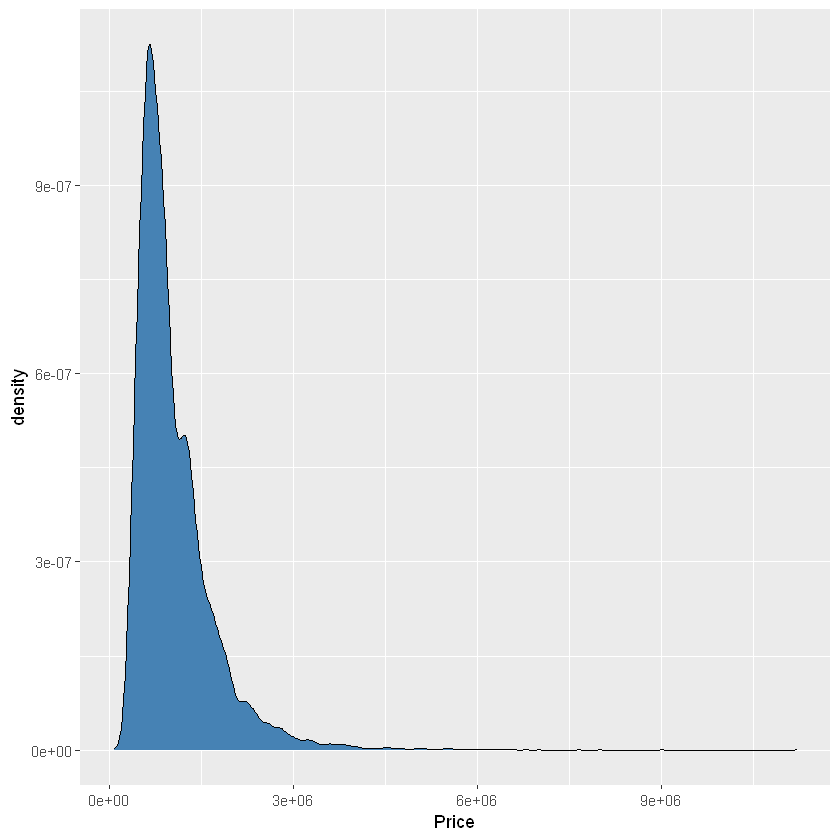

In [15]:
ggplot(hfull,aes(x=Price)) + geom_density(fill="steelblue")

En el gráfico se observa que el precio no sigue una distribución normal ya que se trata de una distribución asimétrica con cola derecha, donde el 50% de los valores se encuentran entre 635k y 1.295k AUSD. El precio medio de la vivienda es superior a 1 millón AUSD, aunque es importante comentar que la mediana y la media no coinciden y que entre ellas hay una diferencia de 180k AUSD.

Estableceremos un primer grupo de variables, relacionadas con la ubicación. Estas variables son **Suburb**, **Address**, **Distance**, **Postcode**, **CouncilArea**, **Lattitude**, **Longtitude** y **Regionname**.

El área de Melbourne se divide en regiones representadas por la variable **Regionname**. Estas regiones se dividen en áreas más pequeñas denominadas áreas de gobierno local que las encontramos en la variable **CouncilArea**, y cada una de ellas, a su vez, se dividen en suburbios cuya variable es **Suburb**.

Cada suburbio **Suburb** está asociado a un código postal **Postcode**, por lo que se trata de dos etiquetas distintas que designan una misma realidad. Hemos eliminado la variable **Postcode** para evitar redundancias.

In [16]:
hfull$Postcode = NULL 

La variable **Regionname** es un factor con 9 categorías, mientras que **CouncilArea** tiene 34 y **Suburb** tiene 324, por lo que para estudiar el precio de la vivienda en función del área donde se encuentra hemos decidido utilizar la variable **Regionname** por su mayor sencillez.

Dibujamos un diagrama de barras para estudiar la proporción de datos que tenemos para cada categoría. Vemos como la mayoría de viviendas que se han vendido pertenecen a la región Metropolitan mientras que las que pertenecen a la región Victoria son escasas.

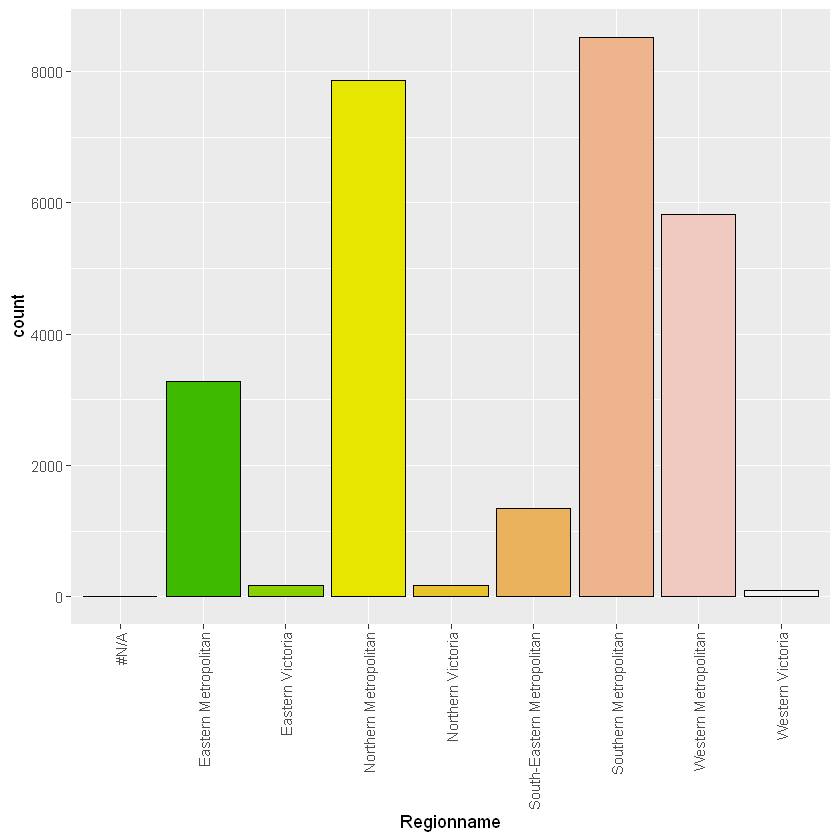

In [17]:
ggplot(hfull) + 
    geom_bar(mapping=aes(x=Regionname), fill=terrain.colors(9), color="black") +
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

Para estudiar su relación con la variable **Price** realizaremos un boxplot por niveles. Vemos como para los valores superiores todas las regiones contienen valores atípicos y como la región parece tener influencia en el precio de la vivienda, para poder afirmarlo con seguridad habría que estudiar si esta diferencia entre regiones es significativa.

Vemos que la distribución en las regiones de Victoria tienen un rango de precios más limitado, mientras que los máximos y mínimos de las regiones de Metropolitan están bastante separados. También se puede observar como los valores medianos de los precios en las regiones de Metropolitan son más elevados que en las regiones de Victoria.

Cabe destacar la región Southern Metropolitan que es la que presenta un mayor rango de precios, aparece como la región con el precio mediano más elevado, y además posee una gran cantidad de valores atípicos en el margen superior.


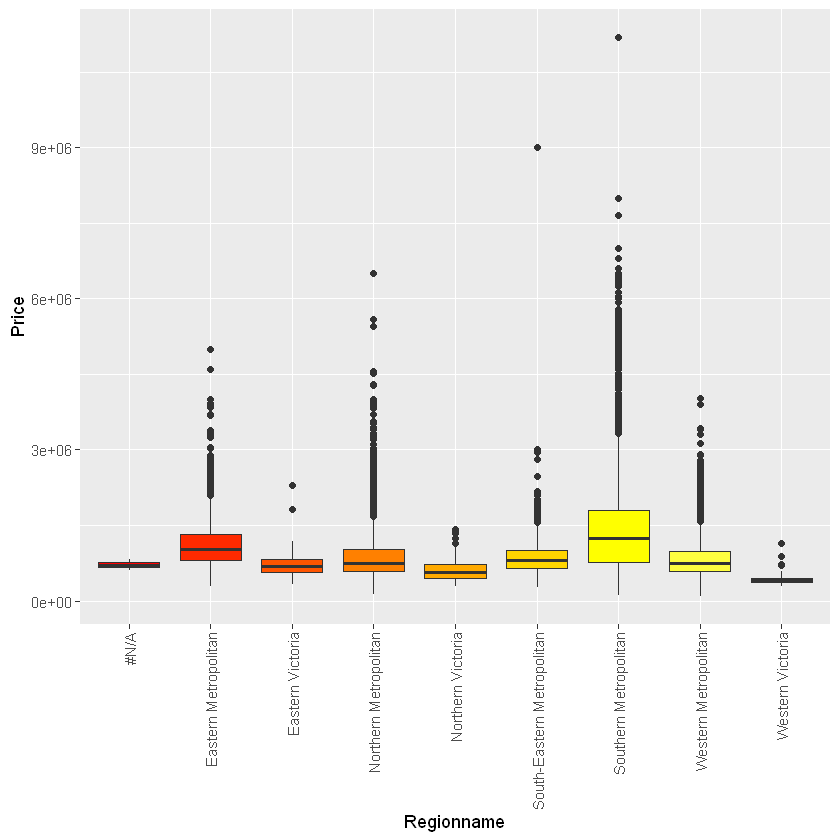

In [18]:
ggplot(hfull) + 
    geom_boxplot(mapping=aes(x=Regionname, y=Price), fill=heat.colors(9)) + 
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

La variable **Address** es una variable categórica con 26751 niveles, que es igual al número de observaciones, por lo que la dirección es única para cada fila. Por lo tanto no agrega ningún valor al análisis y podremos eliminarla.

In [19]:
hfull$Address = NULL 

La variable **Distance** es una variable numérica que nos indica la distancia en kilómetros al centro de la ciudad. Al representar la variable con una curva de densidad vemos que la mayoría de casas se encuentran entre aproximadamente 5 y 10 kilómetros del centro.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

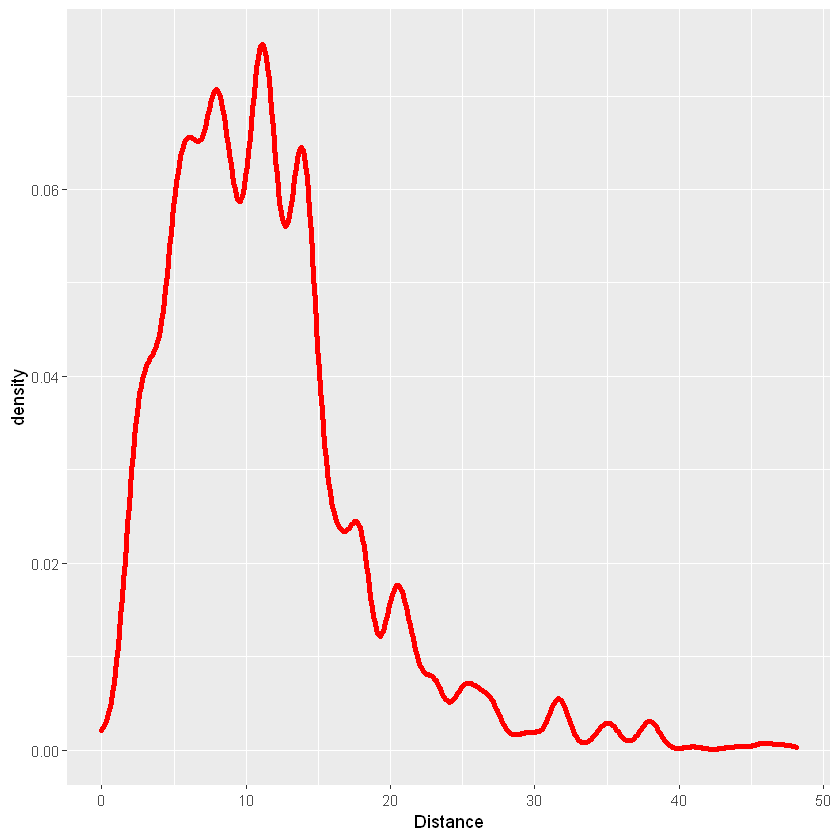

In [20]:
ggplot(hfull) + 
  geom_density(mapping=aes(x=Distance), color="red", size=1.5)

Representamos las dos variables continuas **Distance** y **Price** y ajustamos una recta de regresión lineal. Vemos que la recta tiene algo de pendiente y que ésta es decreciente, lo que nos indica que el precio de la vivienda disminuye al aumentar la distancia al centro. Habría que analizar si esta relación entre ambas variables es en realidad una relación lineal o es de otro tipo, ya que parece que al principio el precio de la vivienda aumenta hasta alcanzar un máximo y a partir de ese punto empieza a decrecer.

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

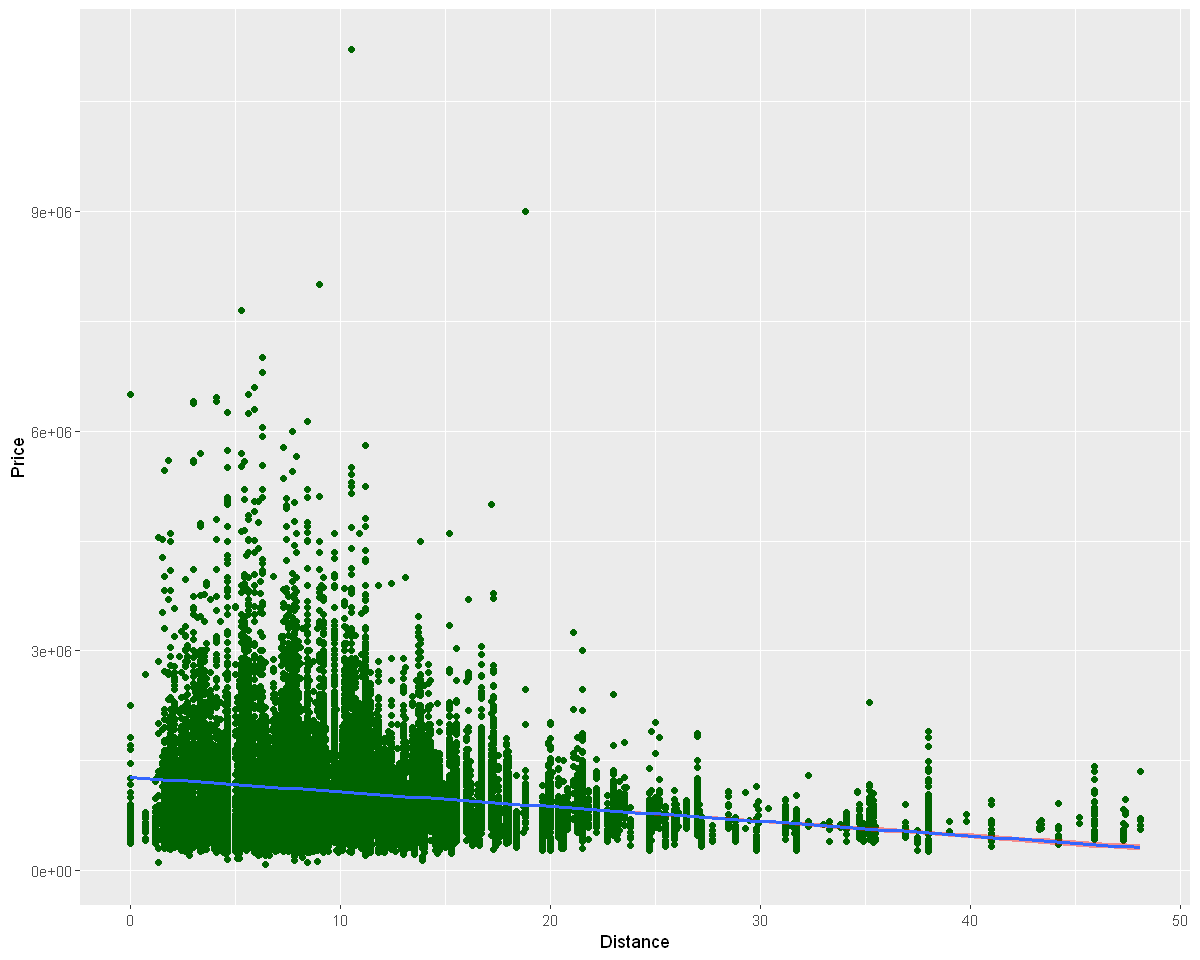

In [25]:
ggplot(hfull) +
  geom_point(mapping=aes(x=Distance, y=Price), col="darkgreen") +
  geom_smooth(mapping=aes(x=Distance, y=Price), method="lm", fill="red")

Para estudiar la influencia de las variables **Lattitude** y **Longtitude** en la variable **Price** representamos los puntos correspondientes a la latitud y longitud y asignamos un color en función del precio. En el gráfico no vemos ningún patrón que nos permita extraer conclusiones de cómo se relacionan estas variables.

In [23]:
options(repr.plot.width = 10, repr.plot.height = 8)

Warning message:
"Removed 6254 rows containing missing values (geom_point)."

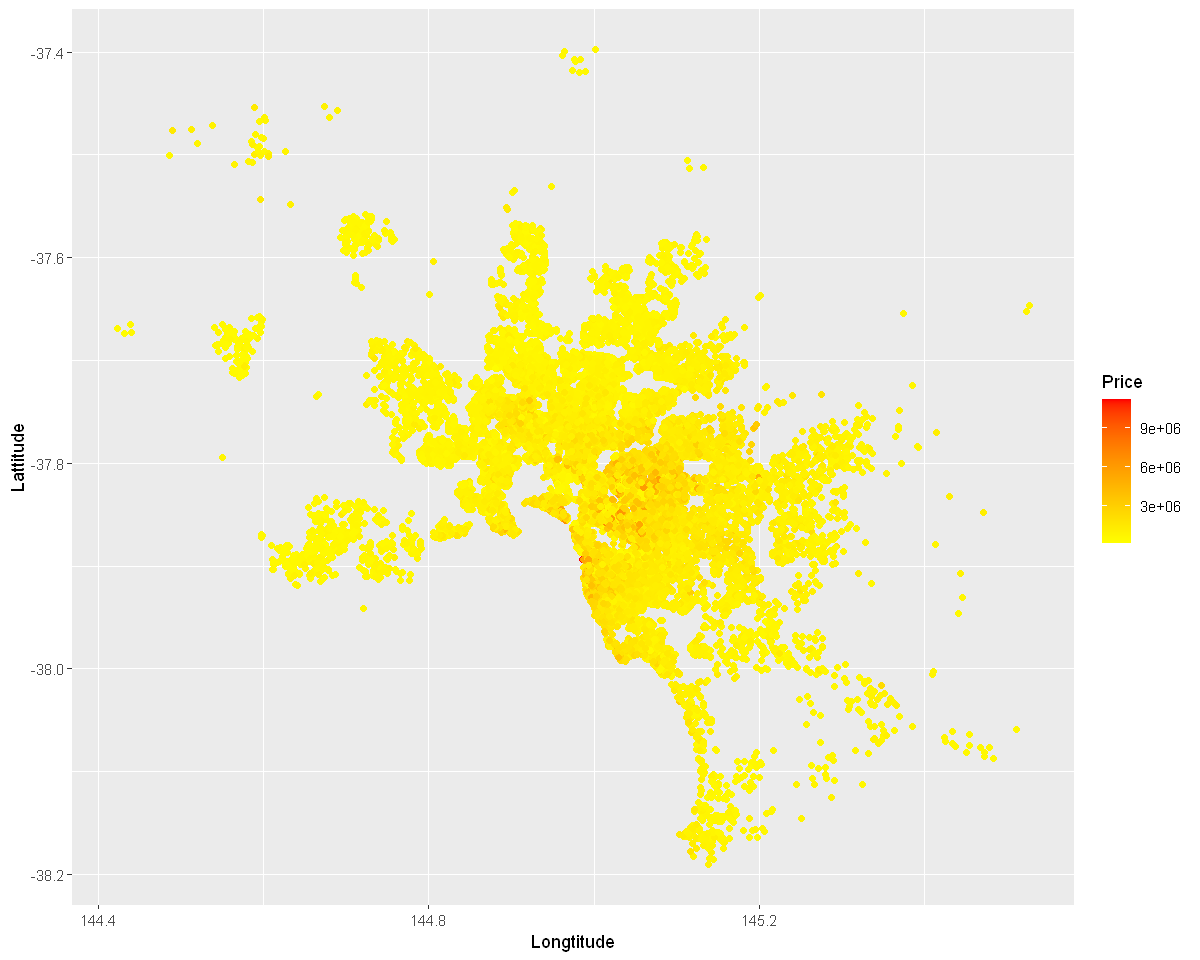

In [24]:
ggplot(data = hfull, aes(y=Lattitude, x=Longtitude)) + 
  geom_point(aes(colour=Price)) + 
  scale_colour_gradient(low = "yellow", high = "red")

Podemos establecer un segundo grupo de variables que son las que están relacionadas con las características de la vivienda. A este grupo pertenecen las variables **Rooms**, **Type**, **Bedroom2**, **Bathroom**, **Car** y **Landsize**.

Para analizar la relación entre las variables continuas de este grupo vamos a dibujar una matriz de correlación, donde por encima de la diagonal tendremos unos círculos de colores cuyo tamaño está asociado al valor absoluto de correlación y por debajo de la diagonal se observan los valores exactos de correlación.

In [ ]:
my_corrdata = hfull[,c(2, 4, 9, 10, 11, 12)]
my_corrdata = my_corrdata[complete.cases(my_corrdata), ]
corr = round(cor(my_corrdata),1)
corrplot.mixed(corr)

En la matriz de correlación observamos como las variables **Rooms** y **Bedroom2** están fuertemente relacionadas, por lo que decidimos eliminar la variable **Bedroom2** de nuestro conjunto de datos ya que contiene una cuarta parte de valores ausentes, mientras que la variable **Rooms** no contiene ningún valor ausente. 

También observamos como la variable **Bathroom** está relacionada con la variable **Rooms** aunque con un coeficiente de correlación de 0.6 no lo consideramos suficiente para descartar la variable.

In [ ]:
hfull$Bedroom2 = NULL 

La variable que más correlacionada está con el precio es **Rooms**, por lo que estudiaremos como afecta esta variable al precio de la vivienda. La variable **Car** también parece influir aunque en menor medida en el precio de la vivienda, mientras que **Landsize** no parece presentar ninguna influencia.

En el siguiente gráfico observamos que cuando el número de habitaciones es menor que seis existe una relación lineal positiva entre el número de habitaciones de la vivienda y su precio.

In [ ]:
ggplot(hfull) +
  geom_point(mapping=aes(x=Rooms, y=Price), col="orange") +
  geom_smooth(mapping=aes(x=Rooms, y=Price), method="lm", fill="red")

La variable **Type** se estudiará a parte ya que se trata de una variable categórica. A partir del siguiente gráfico podemos observar que el tipo de vivienda está relacionada con el precio.

Se observa como las casas aisladas (representadas en color rojo) son las que mayor precio tienen, seguidas de las casas adosadas (representadas en color verde) y las viviendas colectivas (representadas en color azul) son las de menor precio. El precio medio de una casa aislada es de 1 millón 200 mil dólares, de una casa adosada es de unos 900 mil dólares y un apartamento cuesta aproximadamente de media 600 mil dólares.

También se puede observar como muy cerca del centro todas las viviendas son colectivas mientras que las más alejadas son casas aisladas y a una distancia media encontramos todos los tipos de viviendas. 


Al observar cómo influye la variable **Propertycount** en función de **Price** no observamos ningún patrón que nos indique que el número de casas en cada suburbio esté relacionado con el precio.

In [ ]:
ggplot(hfull, aes(x=as.numeric(as.character(Distance)), y=Price)) + 
  geom_point(aes(colour=Type)) +
  xlab("Property count") + 
  ylab("Price")

In [ ]:
hfull %>% 
group_by(Type) %>%
summarise(Mean = mean(Price, na.rm = T))

Las variables relacionadas con el vendedor son **Method** y **ShellerG**.

La variable **Method** es una variable categórica con 5 niveles. A partir de la representación de curvas de densidad para cada categoría observamos como en general las propiedades vendidas por cada uno de los métodos no difieren mucho. Por lo que podemos decir que los precios de las viviendas con diferentes métodos de venta son relativamente iguales.

In [ ]:
ggplot(hfull) +
  geom_density(mapping=aes(x=Price, color=Method))

En cuanto a la variable **SellerG** es una variable categórica con 349 niveles que nos informa sobre la agencia inmobiliaria que vendió la casa. Al presentar tantos niveles este factor no nos será de gran ayuda para estudiar la variable de salida **Price** por lo que la eliminaremos del modelo.

In [ ]:
hfull$SellerG = NULL 

Otra característica importante a tener en cuenta para estudiar el precio de la vivienda es la fecha en la que se vendió la casa, representada por la variable **Date**. Para ello realizamos la siguiente representación que muestra la evolución del precio conforme a la fecha y dibujamos la línea de tendencia para el precio medio. 

Aunque parece haber cierta dependencia del precio en función de la época del año y un patrón general de decrecimiento en el precio de la vivienda a lo largo del tiempo sería recomendable utilizar un modelo para series temporales que nos permita estudiar la estacional y la tendencia de esta serie, para ver si realmente el precio de la vivienda varía conforme la época del año y cuál es el comportamiento de esta variable a medida que pasa el tiempo.

In [ ]:
hfull$Date <- dmy(as.character(hfull$Date))
Price_Date <- hfull[c("Suburb","Price","Date")] %>% na.omit()
averPrice_date <- Price_Date %>% 
    group_by(Date) %>%
  summarise(Average = sum(Price)/n())

In [ ]:
ggplot(Price_Date, aes(Date, Price)) +
  geom_boxplot(aes(group = Date),color = "black",fill = "maroon") +
  geom_line(aes(Date, Average), data = averPrice_date, color = "red", size = 1.3)

Como resumen de este análisis exploratorio para estudiar que variables presentan una mayor influencia en el precio de la vivienda en Melbourne extraemos las siguientes conclusiones:

Las variables relacionadas con la ubicación de la vivienda tienen influencia en el precio, destacando la variable **Distance** que nos indica una disminución del precio a medida que aumenta la distancia al centro, y la variable **Regionname** que hace referencia al área donde se encuentra la vivienda.

Las variables relacionadas con las características de la vivienda también afectan al precio de ésta, sobre todo hay que hacer referencia a las variables **Romms** y **Bathroom**, que nos muestran cómo a mayor número de habitaciones y baños aumenta el precio de la vivienda. La variable **Type** también es una variable relevante, ya que dependiendo de si se trata de una vivienda aislada, un adosado o un apartamento el precio de la vivienda es diferente.

Mientras que no se ha encontrado una relación significativa entre las características relacionadas con el vendedor, la fecha en la que se vendió la vivienda representada mediante la variable **Date** también parece influir en el precio medio de la vivienda.